<center><h1>Lab 15:<br>Measuring Harmonic Motion</h1></center>
<h2>Introduction</h2>
In this lab, we will study simple harmonic motion by measuring oscillations of a mass attached to a conical spring. The spring has been wound so that it has an effective spring constant $k$ and it is attached to a block (+ a block holder) of total mass $M$.
<br><br>
We will use a range finder that emits ultra-sonic pulses to measure the distance from the box to the nearest object by measuring the time delay of the reflected pulse. If the spring were massless (as in most physics lectures), then we would expect that the angular frequency of the oscillations would be<br>
$\omega = \sqrt{\frac{k}{M}}$ (massless spring)
<br>
For a massive spring, the angular frequency will be<br>
$\omega = \sqrt{\frac{k}{M+cm_{\text{spring}}}}$<br>
where $0 \leq c \leq 1$ and $m_{\text{spring}}$ is the mass of the spring.<br>
The value of constant $c$ depends on how the mass of the spring is distributed along the spring. In this experiment, we will measure $c$.

<h2>Phase 1: Find the spring parameters</h2>
<h3>The Experimental Setup</h3>
Hang the spring (narrow end up) from the ring stand. Hang a weight holder from the other end of the spring and place the range finder on the ground underneath the weight holder.  You will take data by connecting the range finder to a USB interface box and using the Data Studio software.  Set the experiment up so that you get a three column list where the first column is the time data, the second column is the position data, the third column is the velocity data. Save your data as a "CSV" ("Comma Separated Values") file.  <br>
Use a plumb to align the weight holder and the range finder. In order to get good data, the range finder must always be a least 0.5 meters from the weight holder. Put several different weights on the mass holder and use the range finder to measure the period of oscillation for several different masses. <br>
Since<br>
$T= \frac{2 \pi}{\omega} = 2 \pi \sqrt{\frac{M = cm_{\text{spring}}}{k}}$
<br>
Thus, if we vary $M$, a plot of $T^2$ against $M$ should result in a straight line with slope $\frac{4 \pi^2}{k}$ and y intercept $\frac{4 \pi^2 cm_{\text{spring}}}{k}$. This will allow you to determine both $c$ and $k$.

<h3>Analyzing the Data</h3>
We can read the data from the CSV file with the following code:

In [2]:
%matplotlib widget

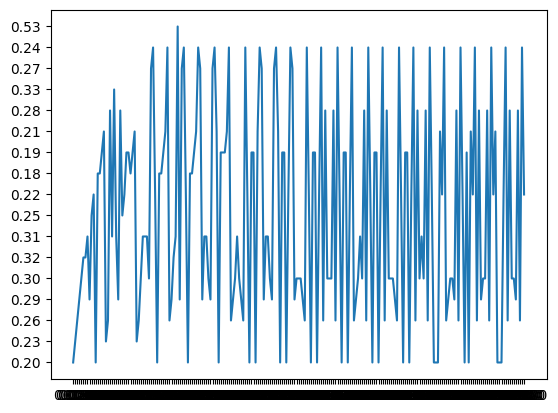

In [2]:
import csv
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

with open('Run 2 sg.csv', 'r') as file:
    reader = csv.reader(file)
    time = []
    pos = []
    vel = []
    for row in reader:
        time.append(row[0])
        pos.append(row[1])
        vel.append(row[2])
time = time[1::]
pos = pos[1::]
vel = vel[1::]

#this will look better with better data
plt.plot(time, pos)
plt.show()

You can read the period of the oscillation from the graph (place the curor over the point).  Do this for all the different weights that you used. Some sample data is shown below. Here t1 is the square of the period obtained with weight m1 and so on. The units are SI units.

In [9]:
t1 = 0.8**2
m1 = 0.1
t2 = 1**2
m2 = 0.2
t3 = 1.15**2
m3 = 0.3
t4 = 1.3**2
m4 = 0.4
t5 = 1.5**2
m5 = 0.5
data = [[m1, t1],[m2,t2],[m3,t3],[m4,t4],[m5,t5]]

In [10]:
%matplotlib inline

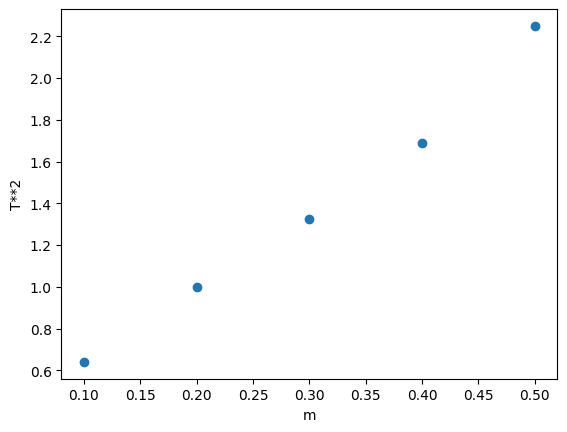

In [11]:
x, y = zip(*data)
plt.plot(x,y,'o')
plt.xlabel('m')
plt.ylabel('T**2')
plt.show()

We can use polyfit to find the slope and y intercept

In [12]:
fit = np.polyfit(x,y,deg=1)
slope = fit[0]
yint = fit[1]
fit

array([3.91  , 0.2075])

The slope is 3.91:

In [13]:
k = (2 * np.pi)**2/(slope)
print(k)

10.096781995999345


The mass of the spring we used was (weight your spring - it might not have teh same mass!) $m_{\text{spring}} = 0.173$kg. Since $c = \frac{k \cdot (\text{y-intercept})}{4 \pi^2 m_{\text{spring}}}$ we have:

In [14]:
c = yint * k/(4 * np.pi**2 * 0.173)
print(c)

0.3067575358869362


The values of $k$ and $c$ may be different for your spring, although you should check to make sure your particular values are physically resonable!
<br><br>
We should calculate the standard deviation of our data. Recall that the data in question is:

In [15]:
data

[[0.1, 0.6400000000000001],
 [0.2, 1],
 [0.3, 1.3224999999999998],
 [0.4, 1.6900000000000002],
 [0.5, 2.25]]

We have already separated this data into $x$ and $y$ lists:

In [16]:
mdata = x
tdata = y
mdata, tdata

((0.1, 0.2, 0.3, 0.4, 0.5),
 (0.6400000000000001, 1, 1.3224999999999998, 1.6900000000000002, 2.25))

In [17]:
theory = np.polyval(fit, mdata)
theory

array([0.5985, 0.9895, 1.3805, 1.7715, 2.1625])

and the standard deviation is $\sigma = \sqrt{\frac{\Sigma(T_\text{theory} - T_{experiment})}{N-1}}$

In [18]:
sd = np.sqrt(sum((np.asarray(theory) - np.asarray(tdata))**2) / (len(mdata) - 1))
sd

0.06981224820903577

We used np.asarray to use our lists are numpy arrays which allows us to subtract two arrays element by element, without use of a for loop. For example these two statments are essentially the same, but one is much simpiler (and faster!). This is known as "vectorization".

In [19]:
list1 = [0,1,2,3]
list2 = [0,1,2,3]
sum1 = sum(np.asarray(list1) - np.asarray(list2))
sum2 = sum([i - j for i in list1 for j in list2])
sum1, sum2

(0, 0)

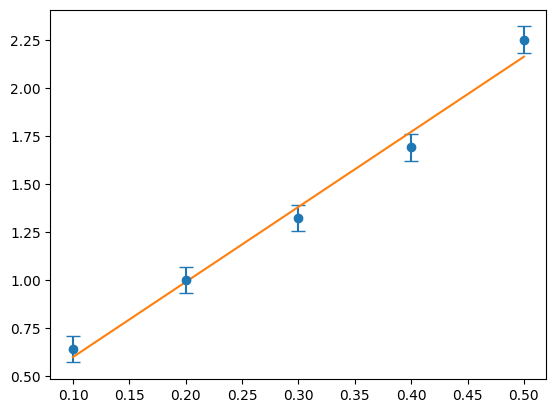

In [20]:
plt.errorbar(x,y, yerr=sd, fmt='o', capsize=5)
plt.plot(x, theory)
plt.show()

Comparison with fitted function shows that we have good agreement.

<h2>Phase 2: SHM and Damped HM</h2>
<h3>Simple Harmonic Motion</h3>
Now that you know the values of $c$ and $k$ for your spring, it is time to go back and take some more data as a check. Use a different mass. How does your predicted period compare with your measured period for this mass. What is the amplitude of the motion? What is the phase angle?  When you are satisfied  that your fit makes good predictions, then you may move on.  <p style='color:blue'>(Note, though, that I'll be specifically looking for this kind of check in the Lab Report, so don't skip it!)</p>
Now put a CD on the weight holder and put some weights on top of the CD. The CD serves to damp the motion due to the air resistance. Repeat the analysis above to find the amplitude, the phase factor and now the damping factor. This is last weeks lab with real data.
<br><br>
As and example consider the data we looked at earlier.

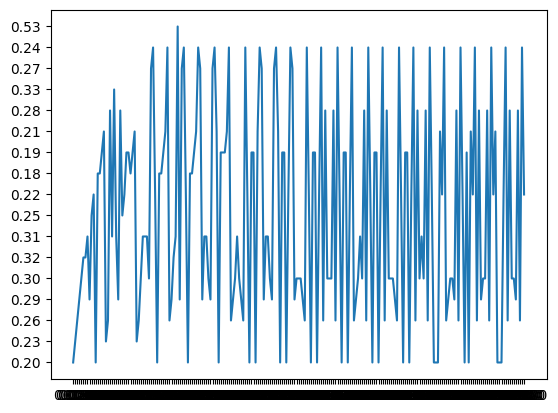

In [21]:
#this will look better with better data
plt.plot(time, pos)
plt.show()

Recall that the angluar frequency is given by

In [22]:
def ω(c, M, m, k):
    return np.sqrt(k/(M+c*m))

We know (from the previous section) that k=10.1 N/m, m=0.173 kg and c=0.31, and the mass of the weight plus the weight holder is M=.2 kg, so we can calculate $\omega$

In [23]:
k = 10.1
m = 0.173
M = 0.2
c = 0.31
ω(c, M, m, k)

6.310450668804691

We can now use curve_fit to fit our data to a combination of sines and cosines. We have to remember to include a linear term in our fit since this term will fix the initial release point of the oscillator.

0.37931601196728726 -0.00246684372061727 0.004095110380777689 0.25067899955166634


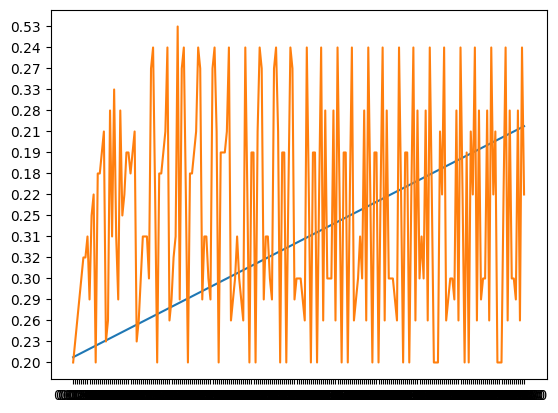

In [63]:
import scipy.optimize as so


#not correct at all
#def FitFunc(t, ω, a):
def FitFunc(t, ω, a, b, c):
    return a * np.sin(ω*t) + b*np.cos(ω*t) + c
    #return a * np.sin(ω*t)
param, paramcovar = so.curve_fit(FitFunc, time, pos)
print(*param)
fit_eval = [FitFunc(*param, float(i)) for i in time]
plt.plot(time, fit_eval)
plt.plot(time, pos)
plt.show()

<h3>Damped Harmonics</h3>
When analyzing yout damped harmonic motion data keep in mind that you can use your mouse to pick out the peaks of your damped data. (so long as you are using an interactive plot, e.g. %matplotlib widget). You can then fit the peaks using curve_fit to $e^{-\frac{\gamma t}{2}}$. This will give you $\gamma$. This is illustrated below.

In [64]:
#import damped harmonic data
#will have to do this section again with given data

Using the ability to track points on the curve, we will extract the position of the peaks. The result is below.

In [1]:
peaks = [[0.211464, 0.935688], [1.30155, 0.935688], [2.11911, 
    0.93221], [3.2092, 0.929428], [4.1176, 0.925254], [5.11685, 
    0.923168], [6.29777, 0.921776], [7.11534, 0.920385], [8.29626, 
    0.914821], [9.11383, 0.916212], [10.1131, 0.910647], [11.2032, 
    0.909952], [12.1116, 0.907865], [13.2016, 0.907169], [14.2009, 
    0.903691], [15.2001, 0.9023], [16.1994, 0.899518], [17.1986, 
    0.898127], [18.1979, 0.893953], [19.1971, 0.891867], [20.2872, 
    0.88978], [21.2864, 0.88978], [22.2857, 0.886998], [23.2849, 
    0.886302], [24.1933, 0.884911], [25.1926, 0.88352], [26.1918, 
    0.882128], [27.2819, 0.880737], [28.0995, 0.878651], [29.3712, 
    0.875868], [30.1888, 0.874477], [31.3697, 0.873086], [32.2781, 
    0.870304], [33.2774, 0.869608], [34.1858, 0.868913], [35.2759, 
    0.86613], [36.2751, 0.865435], [37.3652, 0.865435], [38.2736, 
    0.864739], [39.2729, 0.861261], [40.0904, 0.860566], [41.2713, 
    0.858479], [42.1797, 0.85987], [43.2698, 0.857088], [44.1782, 
    0.857088], [45.2683, 0.855001], [46.1767, 0.854305], [47.176, 
    0.852219], [48.1752, 0.850828], [49.3561, 0.852219], [50.1737, 
    0.850132], [51.0821, 0.848741], [52.0814, 0.84735], [53.2623, 
    0.848045], [54.2615, 0.845263], [55.2608, 0.844567], [56.26, 
    0.842481], [57.2593, 0.843176], [58.2585, 0.841785], [59.2578, 
    0.841089]]

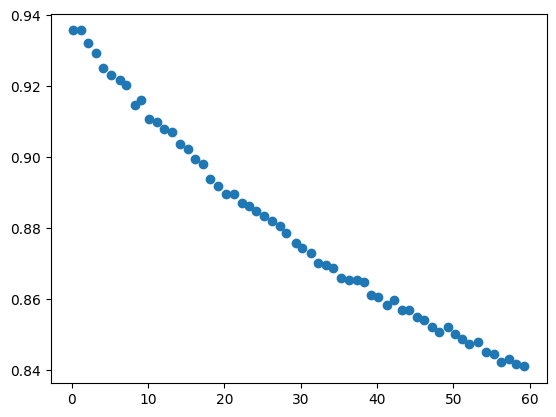

In [22]:
peaks_x, peaks_y = zip(*peaks)
plt.plot(peaks_x,peaks_y,'o')
plt.show()

To do the fitting we use <b>curve_fit</b>. curve_fit gives us more control over the function and will give us more useful parameters.
<br>
Our model will be:<br>
$a e^{\frac{-\gamma t}{2}} + d$
<br>
where $a$ is the initial amplitude and $d$ is the displacement. Because the origin is not necessarily at $x=0$, we need the $d$ term so:

a:  0.13984388449589244 γ:  0.039488192824612904 d: 0.7977324661363112


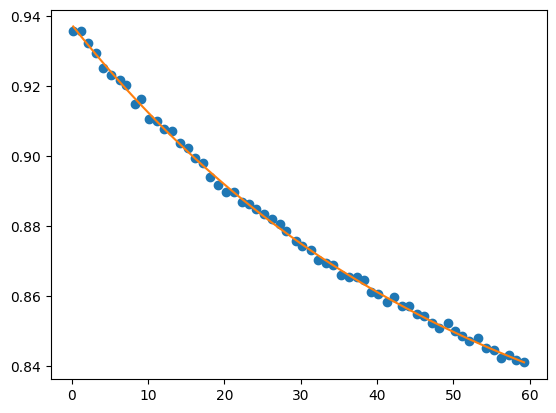

In [46]:
import math

def ModelFunc(t, a, γ, d):
    return a * math.e**((-γ*t)/2) + d

popt, pcov = so.curve_fit(ModelFunc, peaks_x, peaks_y, bounds=[(0,0,0),(1,0.05,0.91)])
print('a: ', popt[0], 'γ: ', popt[1], 'd:', popt[2])

eval_model = [ModelFunc(i, *popt) for i in peaks_x]

plt.plot(peaks_x, peaks_y, 'o')
plt.plot(peaks_x, eval_model)
plt.show()

As you can see it is a good fit.<br>
So we have that:<br>
$d\approx 0.8$<br>
$a\approx 0.14$<br>
$\gamma \approx 0.038$<br>
Now we will use curve_fit to finish the job
<br>
<br>
<i>I have no data to fit against, so I am just plotting the function</i>

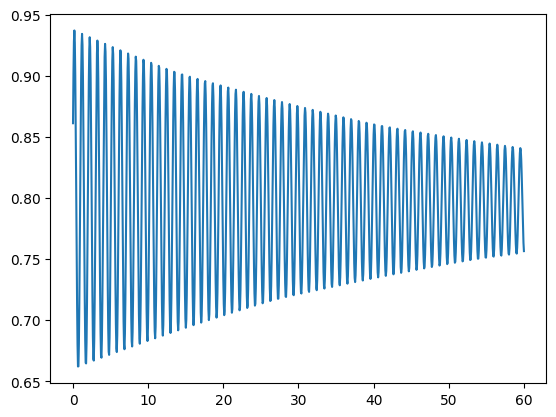

In [74]:
def FullModel(t, a, γ, d, w, ϕ):
    return a * math.e**((-γ*t)/2) * math.cos(math.sqrt(w**2 - (γ**2/4))*t + ϕ) + d

t = np.linspace(0,60,1000)

full_eval = [FullModel(i, *popt, 6.14, -1.1) for i in t]

plt.plot(t, full_eval)
plt.show()

If the results don't match up, the first thing one should try is changing the values of the guesses. However, in our first example the fit is quite good. <i>NEED DATA</i>

<h3>One last Experiment</h3>
Pick one of the masses that you used in part one (the measurement of $c$ and $k$). Now turn the spring upside down. That is hang it large end up. Measure the period. Can you explain what happens?

<h2>Upshot</h2>
This is a rough outline of the experiment. <i>This is not necessarily a complete list of what needs to be done</i>.
<br>
1) Take four datasets (using four different masses), find the period squared for each.
<br>
2) Take a fifth dataset that has a different mass from the previous four.  This will allow us to check our results.
<br>
3) Use a CD to make a damped harmonic oscillator and calculate the damping coefficient ($\gamma$), as well as the angular frequency ($\omega$), the phase angle ($\phi$), and the amplitude ($A$).
<br>
4) Take a final data set with the spring the other way round, and comment on the results.

<h2>Assignment</h2>
The assignment for Week 15 is a <u>full Lab Report</u> which addresses all relevant questions and results from this writeup, and reflects on each.  This report should be written in accordance with the general rules and guidelines of the Syllabus for this course; please ask if there are any questions about what specifically is required.